In [65]:
from tabulate import tabulate

import numpy as np
import torch
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from train import train_bc_agent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import os
from run_expert import run_expert
from train import train_bc_agent
from agent import run_agent

MAX_TIMESTEPS=500
NUM_ROLLOUTS=1000

def run_experts(max_timesteps=100, num_rollouts=20, render=False, quiet=False):
  returns = {}
  for filename in os.listdir('./experts/'):
    env_name = filename[:-4]

    returns[env_name] = run_expert(f"./experts/{filename}", 
                                   env_name, 
                                   max_timesteps=max_timesteps, 
                                   num_rollouts=num_rollouts, 
                                   render=render, 
                                   quiet=quiet)
  return returns
  
  
def train_bc_agents():
  result = {}
  for filename in os.listdir('./expert_data/'):
    expert_name = filename[:-4]
    
    print(f"Training bc agent for {expert_name}")
    agent, train_losses, test_losses = train_bc_agent(expert_name)
    
    result[expert_name] = (agent, train_losses, test_losses)
  return result


def plot_losses(agent_name, train_losses, test_losses):
  n_epochs = len(test_losses) - 1

  x_train = np.linspace(0, n_epochs, len(train_losses))
  x_test = np.arange(n_epochs + 1)

  plt.figure()
  plt.plot(x_train, train_losses, label='train loss')
  plt.plot(x_test, test_losses, label='test loss')
  plt.title(agent_name)
  plt.legend()
  plt.show()

In [76]:
expert_returns = run_experts(max_timesteps=MAX_TIMESTEPS, num_rollouts=NUM_ROLLOUTS, quiet=True)

/Users/leourbina/.pyenv/versions/anaconda3-2019.10/envs/cs285/lib/python3.8/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
  0%|          | 1/1000 [00:00<03:53,  4.28it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  1%|          | 6/1000 [00:00<00:47, 20.96it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 1/1000 [00:00<01:59,  8.35it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 2/1000 [00:00<01:46,  9.41it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  2%|▏         | 23/1000 [00:00<00:04, 224.31it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 1/1000 [00:00<05:28,  3.05it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


100%|██████████| 1000/1000 [05:16<00:00,  3.16it/s]


In [77]:
result = train_bc_agents()

Training bc agent for Ant-v2


Epochs: 100%|██████████| 10/10 [02:45<00:00, 16.56s/it]


Training bc agent for HalfCheetah-v2


Epochs: 100%|██████████| 10/10 [02:26<00:00, 14.65s/it]


Training bc agent for Hopper-v2


Epochs: 100%|██████████| 10/10 [02:22<00:00, 14.28s/it]


Training bc agent for Walker2d-v2


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training bc agent for Reacher-v2


Epochs: 100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


Training bc agent for Humanoid-v2


Epochs: 100%|██████████| 10/10 [02:53<00:00, 17.31s/it]


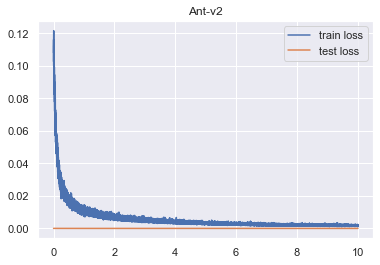

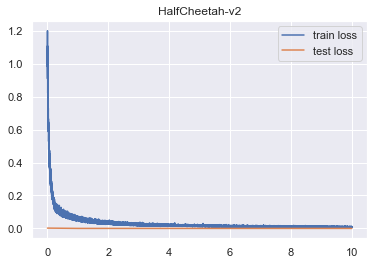

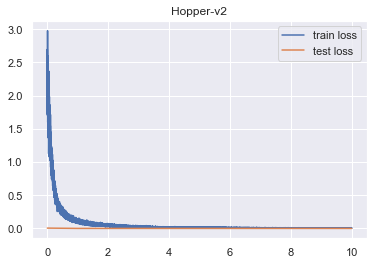

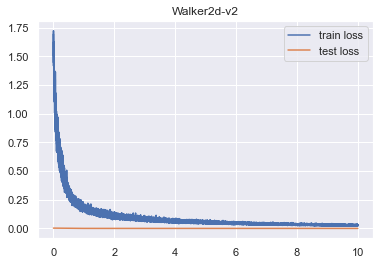

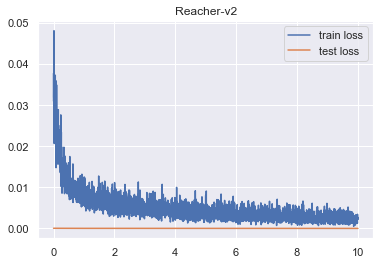

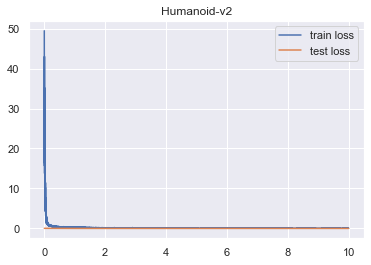

In [78]:
for agent_name in result.keys():
    _, train_losses, test_losses = result[agent_name]
    plot_losses(agent_name, train_losses, test_losses)

In [79]:
agent_returns = {}
for filename in os.listdir('./trained_agents/'):
  if filename.startswith('.'):
    continue

  env = filename[:-3]
    
  agent_returns[env] = run_agent(f"./trained_agents/{filename}", env, 
                                 num_rollouts=NUM_ROLLOUTS, 
                                 max_timesteps=MAX_TIMESTEPS, quiet=True)

/Users/leourbina/.pyenv/versions/anaconda3-2019.10/envs/cs285/lib/python3.8/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
  0%|          | 1/1000 [00:00<02:06,  7.87it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 1/1000 [00:00<01:58,  8.46it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 0/1000 [00:00<?, ?it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 1/1000 [00:00<01:45,  9.44it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  0%|          | 0/1000 [00:00<?, ?it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  1%|          | 9/1000 [00:00<00:11, 89.78it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


100%|██████████| 1000/1000 [00:11<00:00, 84.51it/s]


Performance of HalfCheetah-v2

agent type      Mean Return    Stdev
------------  -------------  -------
expert              1998.78  58.0815
agent               1952.95  97.4322



Performance of Humanoid-v2

agent type      Mean Return    Stdev
------------  -------------  -------
expert             4906.44   162.882
agent               975.615  388.716



Performance of Ant-v2

agent type      Mean Return    Stdev
------------  -------------  -------
expert              2364.92  142.08
agent               2339.01  191.121



Performance of Hopper-v2

agent type      Mean Return      Stdev
------------  -------------  ---------
expert              1785.57    2.83398
agent               1300.87  246.905



Performance of Walker2d-v2

agent type      Mean Return     Stdev
------------  -------------  --------
expert             2478.5     33.2821
agent               719.952  786.309



Performance of Reacher-v2

agent type      Mean Return    Stdev
------------  -------------  -------


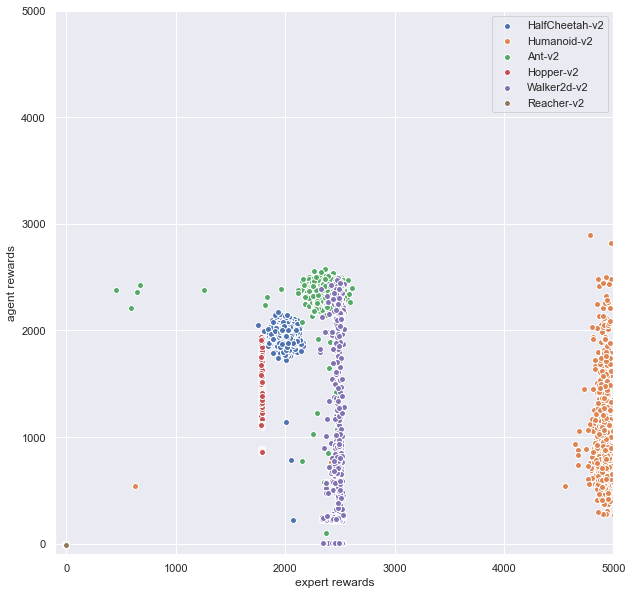

In [93]:
fig = plt.figure(figsize=(10, 10))

data = {}

for i, env in enumerate(agent_returns.keys()):
  agent = agent_returns[env]
  expert = expert_returns[env]
  
  data[env] = []
  data[env].append(["expert", np.mean(expert), np.std(expert)])
  data[env].append(["agent", np.mean(agent), np.std(agent)])
  
  plt.scatter(expert, agent, edgecolors='w', label=env)
  plt.xlim(-100, 5000)
  plt.ylim(-100, 5000)
  plt.xlabel("expert rewards")
  plt.ylabel("agent rewards")
  plt.legend()

for env in data.keys():
  print(f"Performance of {env}\n")
  print(tabulate(data[env], headers=['agent type', 'Mean Return', 'Stdev'], tablefmt='simple'))
  print('\n\n')